In [3]:
# フォント設定
from matplotlib import rcParams
rcParams['font.family'] = 'Noto Sans CJK JP'

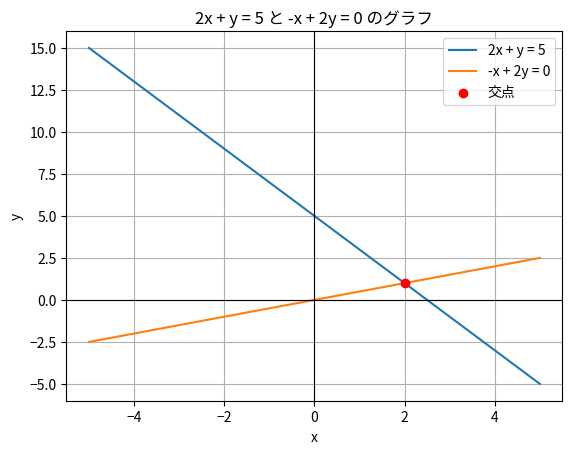

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# xの範囲を設定
x = np.linspace(-5, 5, 100)

# それぞれの方程式からyを解く
y1 = 5 - 2*x           # 2x + y = 5
y2 = (x) / 2           # -x + 2y = 0

# グラフの描画
plt.plot(x, y1, label='2x + y = 5')
plt.plot(x, y2, label='-x + 2y = 0')

# 交点を求める
A = np.array([[2, 1], [-1, 2]])
b = np.array([5, 0])
intersection = np.linalg.solve(A, b)

# 交点をプロット
plt.scatter(intersection[0], intersection[1], color='red', zorder=5, label='交点')

# 軸と凡例
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('2x + y = 5 と -x + 2y = 0 のグラフ')
plt.grid(True)
plt.show()


`np.linalg.solve(A, b)` は、**連立一次方程式**
$$
A \mathbf{x} = \mathbf{b}
$$
を解くための NumPy の関数です。

ここでの内容は次の通りです：

* `A`：係数行列
  $$
  A = \begin{bmatrix} 2 & 1 \\ -1 & 2 \end{bmatrix}
  $$
  これはそれぞれの方程式の (x, y) の係数を並べたものです。

* `b`：定数ベクトル
  $$
  b = \begin{bmatrix} 5 \\ 0 \end{bmatrix}
  $$
  これは方程式の右辺の値を並べたものです。

つまり、

$$
\begin{cases}
2x + y = 5 \\
x + 2y = 0
\end{cases}
$$

  を
  $$
  A \cdot \begin{bmatrix} x \\ y \end{bmatrix} = b
  $$
  の形にして、`np.linalg.solve(A, b)` が
  $$
  \begin{bmatrix} x \\ y \end{bmatrix}
  $$
  を求めています。

この結果が `intersection` に入り、2つの直線の交点座標 ((x, y)) になります。


この2つの直線は平行または一致しています（交点なし）


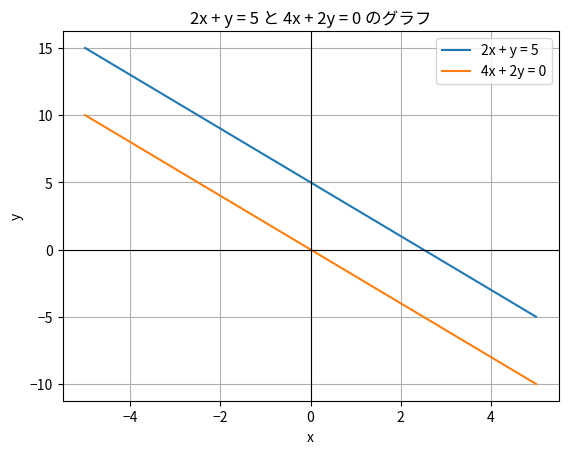

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# xの範囲を設定
x = np.linspace(-5, 5, 100)

# それぞれの方程式からyを解く
y1 = 5 - 2*x          # 2x + y = 5
y2 = -2*x             # 4x + 2y = 0 → y = -2x

# グラフの描画
plt.plot(x, y1, label='2x + y = 5')
plt.plot(x, y2, label='4x + 2y = 0')

# 交点を求める
A = np.array([[2, 1], [4, 2]])
b = np.array([5, 0])

# 行列Aの行列式を確認（0なら平行または同一線）
det = np.linalg.det(A)

if det != 0:
    intersection = np.linalg.solve(A, b)
    plt.scatter(intersection[0], intersection[1], color='red', zorder=5, label='交点')
else:
    intersection = None
    print("この2つの直線は平行または一致しています（交点なし）")

# 軸と凡例
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('2x + y = 5 と 4x + 2y = 0 のグラフ')
plt.grid(True)
plt.show()


# 🟦 ガウスの消去法（軸選択なし）

In [11]:
# ガウスの消去法（軸選択なし）

def gaussian_elimination(A, b):
    n = len(A)
    for k in range(n - 1):
        for i in range(k + 1, n):
            mik = A[i][k] / A[k][k]
            for j in range(k, n):
                A[i][j] = A[i][j] - mik * A[k][j]
            b[i] = b[i] - mik * b[k]
    return A, b


* `A`：係数行列（連立一次方程式の係数部分）
* `b`：定数ベクトル（右辺の値）
* `n`：方程式の数（行列のサイズ）
* `k`：現在のピボット列・行を表すループ変数
* `i`：ピボット行の下の行を表すループ変数
* `j`：行内の列を走査するループ変数
* `mik`：消去のための乗数（`A[i][k] / A[k][k]`）
  　　→ 行`i`からピボット行`k`をどれだけ引くかを決める係数
* `A[i][j]`：行列要素。更新により上三角行列へ変形される
* `b[i]`：右辺ベクトルの要素。対応する行の更新により変化する

返り値

* **`A_result`（返り値の1つ目）**：
    * 消去後の **上三角行列**（変形された係数行列）。
    * ガウスの消去により、元の `A` が上三角形状に変換されています。
* **`b_result`（返り値の2つ目）**：
    * 同様に変形後の **定数ベクトル**。
    * 各行の演算に対応して右辺 `b` も更新されています。

この2つを使えば、「後退代入（back substitution）」で未知数を解くことができます。


### 🟠 実行例

In [14]:
# 3x3 の例
A = [
    [2.0, 1.0, -1.0],
    [-3.0, -1.0, 2.0],
    [-2.0, 1.0, 2.0]
]
b = [8.0, -11.0, -3.0]

A_result, b_result = gaussian_elimination(A, b)

print("変形後の係数行列 A:")
for row in A_result:
    print(row)

print("\n変形後の定数ベクトル b:")
print(b_result)

変形後の係数行列 A:
[2.0, 1.0, -1.0]
[0.0, 0.5, 0.5]
[0.0, 0.0, -1.0]

変形後の定数ベクトル b:
[8.0, 1.0, 1.0]


### 🟠 ステップ毎の変化可視化

In [15]:
from copy import deepcopy
from IPython.display import display, HTML

def display_matrix_diff(A_prev, A_curr, b_prev, b_curr):
    html = "<table style='border-collapse:collapse;'>"
    html += "<tr><th colspan='{}' style='text-align:left;'>A</th><th style='padding-left:20px;text-align:left;'>b</th></tr>".format(len(A_curr[0]))

    for i in range(len(A_curr)):
        html += "<tr>"
        for j in range(len(A_curr[0])):
            val = A_curr[i][j]
            if A_prev is not None and val != A_prev[i][j]:
                html += f"<td style='color:red;padding:4px;'>{val:.3f}</td>"
            else:
                html += f"<td style='padding:4px;'>{val:.3f}</td>"
        html += "<td style='padding-left:20px;'>"
        if b_prev is not None and b_curr[i] != b_prev[i]:
            html += f"<span style='color:red;'>{b_curr[i]:.3f}</span>"
        else:
            html += f"{b_curr[i]:.3f}"
        html += "</td></tr>"
    html += "</table>"
    display(HTML(html))


def gaussian_elimination_debug(A, b):
    n = len(A)
    A_curr = deepcopy(A)
    b_curr = deepcopy(b)
    display_matrix_diff(None, A_curr, None, b_curr)

    for k in range(n - 1):
        for i in range(k + 1, n):
            A_prev = deepcopy(A_curr)
            b_prev = deepcopy(b_curr)

            mik = A_curr[i][k] / A_curr[k][k]
            for j in range(k, n):
                A_curr[i][j] = A_curr[i][j] - mik * A_curr[k][j]
            b_curr[i] = b_curr[i] - mik * b_curr[k]

            display(HTML(f"<b>Step (k={k}, i={i}):</b>"))
            display_matrix_diff(A_prev, A_curr, b_prev, b_curr)
    return A_curr, b_curr


# サンプル実行
A = [
    [2.0, 1.0, -1.0],
    [-3.0, -1.0, 2.0],
    [-2.0, 1.0, 2.0]
]
b = [8.0, -11.0, -3.0]

A_result, b_result = gaussian_elimination_debug(A, b)


# 🟦 過剰条件のパターン
未知数に対して条件が多い

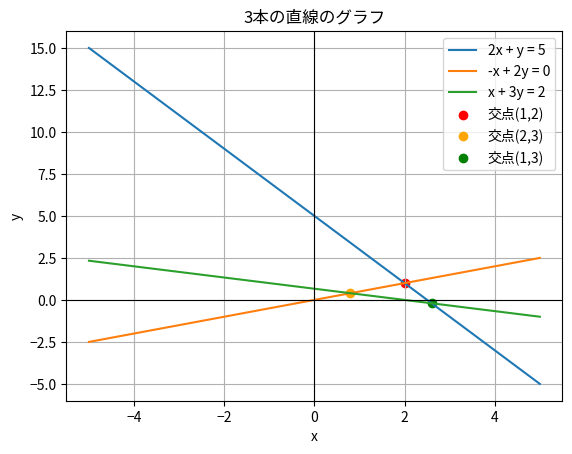

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# xの範囲を設定
x = np.linspace(-5, 5, 100)

# それぞれの方程式からyを解く
y1 = 5 - 2*x           # 2x + y = 5
y2 = (x) / 2           # -x + 2y = 0
y3 = (2 - x) / 3       # x + 3y = 2

# グラフの描画
plt.plot(x, y1, label='2x + y = 5')
plt.plot(x, y2, label='-x + 2y = 0')
plt.plot(x, y3, label='x + 3y = 2')

# 各2直線の交点を求める
def intersection(eq1, eq2):
    A = np.array([eq1[:2], eq2[:2]])
    b = np.array([eq1[2], eq2[2]])
    return np.linalg.solve(A, b)

eq1 = [2, 1, 5]   # 2x + y = 5
eq2 = [-1, 2, 0]  # -x + 2y = 0
eq3 = [1, 3, 2]   # x + 3y = 2

p12 = intersection(eq1, eq2)
p23 = intersection(eq2, eq3)
p13 = intersection(eq1, eq3)

# 交点をプロット
plt.scatter(*p12, color='red', label='交点(1,2)')
plt.scatter(*p23, color='orange', label='交点(2,3)')
plt.scatter(*p13, color='green', label='交点(1,3)')

# 軸と凡例
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('3本の直線のグラフ')
plt.grid(True)
plt.show()


x + 3y = 2　を x + 3y = 5 に変更する

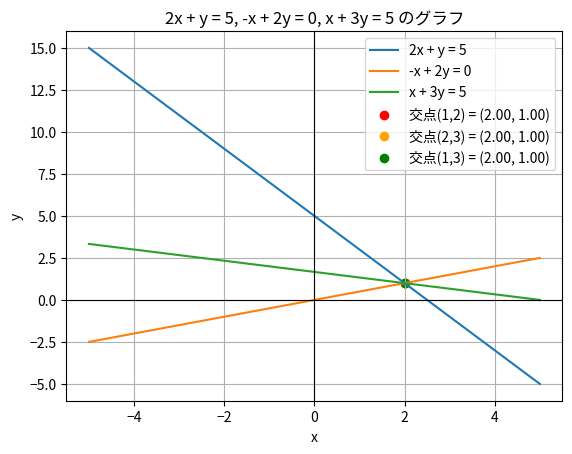

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# xの範囲を設定
x = np.linspace(-5, 5, 100)

# 各直線の式からyを求める
y1 = 5 - 2*x           # 2x + y = 5
y2 = (x) / 2           # -x + 2y = 0
y3 = (5 - x) / 3       # x + 3y = 5

# グラフの描画
plt.plot(x, y1, label='2x + y = 5')
plt.plot(x, y2, label='-x + 2y = 0')
plt.plot(x, y3, label='x + 3y = 5')

# 各2直線の交点を求める関数
def intersection(eq1, eq2):
    A = np.array([eq1[:2], eq2[:2]])
    b = np.array([eq1[2], eq2[2]])
    return np.linalg.solve(A, b)

# 係数と定数の設定
eq1 = [2, 1, 5]   # 2x + y = 5
eq2 = [-1, 2, 0]  # -x + 2y = 0
eq3 = [1, 3, 5]   # x + 3y = 5

# 各交点
p12 = intersection(eq1, eq2)
p23 = intersection(eq2, eq3)
p13 = intersection(eq1, eq3)

# 交点のプロット
plt.scatter(*p12, color='red', label=f'交点(1,2) = ({p12[0]:.2f}, {p12[1]:.2f})')
plt.scatter(*p23, color='orange', label=f'交点(2,3) = ({p23[0]:.2f}, {p23[1]:.2f})')
plt.scatter(*p13, color='green', label=f'交点(1,3) = ({p13[0]:.2f}, {p13[1]:.2f})')

# 軸と凡例
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('2x + y = 5, -x + 2y = 0, x + 3y = 5 のグラフ')
plt.grid(True)
plt.show()


# 🟦 LU分解

計算機で一次方程式（連立一次方程式）を効率的に解くためのアルゴリズム的手法。  
手計算では使わない。

以下をLU分解する

$$
\begin{cases}
x_1 + 2x_2 + 3x_3 = 1 \\
x_1 + 3x_2 + 3x_3 = 2 \\
2x_1 + 5x_2 + 7x_3 = 2
\end{cases}
$$

$$
A =
\begin{bmatrix}
1 & 2 & 3 \\
1 & 3 & 3 \\
2 & 5 & 7
\end{bmatrix},
\quad
b =
\begin{bmatrix}
1 \\
2 \\
2
\end{bmatrix}
$$


In [9]:
import numpy as np
from scipy.linalg import lu

A = np.array([
    [1, 2, 3],
    [1, 3, 3],
    [2, 5, 7]
])

P, L, U = lu(A)

print("P =\n", P)
print("L =\n", L)
print("U =\n", U)


P =
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
L =
 [[ 1.   0.   0. ]
 [ 0.5  1.   0. ]
 [ 0.5 -1.   1. ]]
U =
 [[ 2.   5.   7. ]
 [ 0.   0.5 -0.5]
 [ 0.   0.  -1. ]]


LU分解では、行列 (A) を以下のように分解します：
$$
A = P L U
$$

それぞれの意味は次の通りです。

* P
    * 行の並べ替えを表す**置換行列**。
    * 数値計算の安定性のために使われます。
* U
    * **上三角行列**。
    * 行列Aを**ガウスの消去法**で変換して得られる行列。
* L
    * **下三角行列**。
    * 対角成分は1
    * ガウスの消去で用いた「行操作の情報（どの倍数を引いたか）」を記録した行列

この分解を使うと、連立一次方程式 (Ax = b) を効率的に解くことができます。



### 🟠 前進代入（Forward substitution）

以下の方程式を解きyを得る

$$
L y = b
$$

上から順に $ y_1, y_2, \dots, y_n $ を求めていきます。
例えば3×3の例では：
$$
\begin{cases}
L_{11} y_1 = b_1 \\
L_{21} y_1 + L_{22} y_2 = b_2 \\
L_{31} y_1 + L_{32} y_2 + L_{33} y_3 = b_3
\end{cases}
$$

---

### 🟠 後退代入（Backward substitution）

以下の方程式を解きxを得る

$$
U x = y
$$

下から順に $ x_n, x_{n-1}, \dots, x_1 $ を求めていきます。
3×3の場合：
$$
\begin{cases}
U_{33} x_3 = y_3 \\
U_{23} x_3 + U_{22} x_2 = y_2 \\
U_{13} x_3 + U_{12} x_2 + U_{11} x_1 = y_1
\end{cases}
$$



<div style="border-left: 6px solid #F1C40F; background: #FFF9E6; padding: 8px 12px; border-radius: 6px; color: black;">
  💡 「前進代入」「後退代入」で解を求める方法は、１つ代入すると１つ解が求まるので、それを繰り返せば全ての解が求まる
</div>


In [19]:
from scipy.linalg import lu, solve_triangular

# 前進代入 (Ly = Pb)
Pb = np.dot(P, b)
y = solve_triangular(L, Pb, lower=True)

# 後退代入 (Ux = y)
x = solve_triangular(U, y)

print("解 x =", x)

解 x = [ 46. -19.  -0.]


`solve_triangular` は、**三角行列の連立一次方程式を解く関数**です。

### 主な引数

* `A`: 三角行列（下三角または上三角）
* `b`: 右辺ベクトル
* `lower`:
  * `True` → 下三角行列（前進代入）
  * `False` → 上三角行列（後退代入）
* `unit_diagonal=True` を指定すると、対角成分がすべて1とみなされます（LU分解のLに使うとき便利）

この関数は、単純な`np.linalg.solve`より効率的に三角行列の方程式を解くために使われます。
